In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def show(img):
    plt.figure(figsize=(7,7))
    plt.imshow(img, cmap='gray')

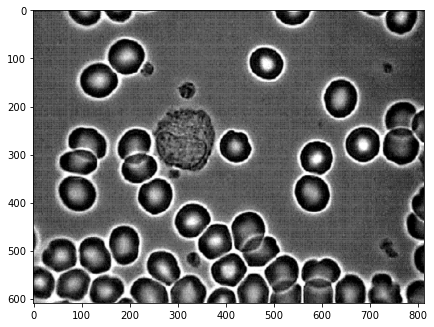

In [3]:
img = cv2.imread('image.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
show(gray)

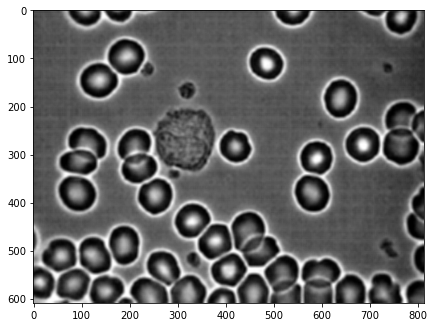

In [4]:
blur = cv2.blur(gray, (7,7))
show(blur)

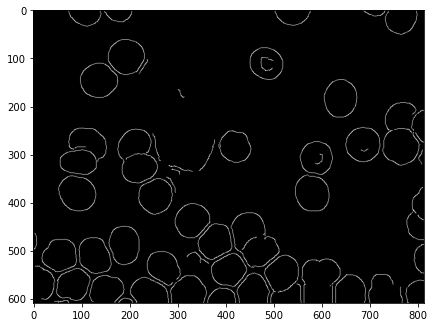

In [5]:
canny = cv2.Canny(blur,130, 240)
show(canny)

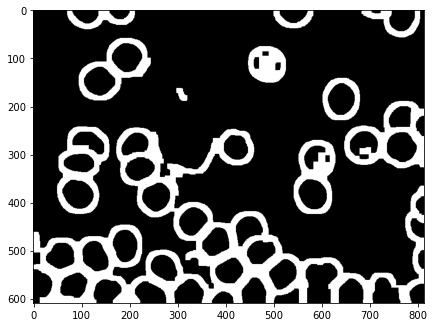

In [6]:
kernel1 = np.ones((5,5),"uint8")
kernel2 = np.ones((4,4),"uint8")
close = cv2.morphologyEx(canny, cv2.MORPH_CLOSE, kernel1, iterations=1)
dilate = cv2.dilate(close, kernel2, iterations = 3)
dilate = cv2.morphologyEx(dilate, cv2.MORPH_CLOSE, kernel1, iterations=2)
show(dilate)

In [7]:
invDilate = dilate.copy()
for i in range(len(invDilate)):
    for j in range(len(invDilate[i])):
        if(invDilate[i][j]>0):
            invDilate[i][j] = 0
        else:
            invDilate[i][j] = 255

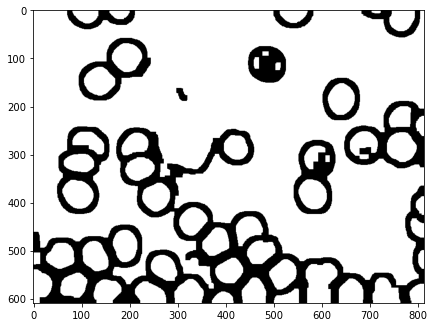

In [8]:
show(invDilate)

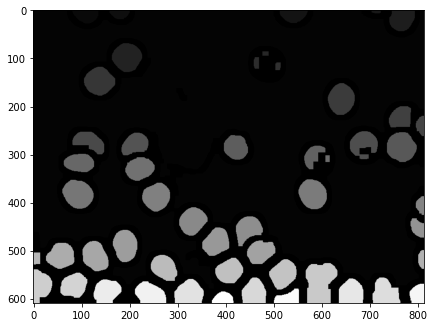

In [9]:
_, markers = cv2.connectedComponents(invDilate)
show(markers)

In [10]:
markI = markers.copy()
for i in range(len(markI)):
    for j in range(len(markI[i])):
        if(markI[i][j]>1):
            markI[i][j]=255
        else:
            markI[i][j]=0

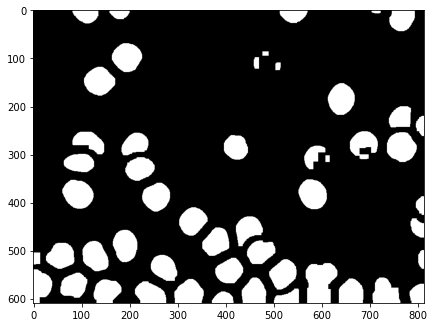

In [11]:
markI2 = markI.astype('uint8')
show(markI2)

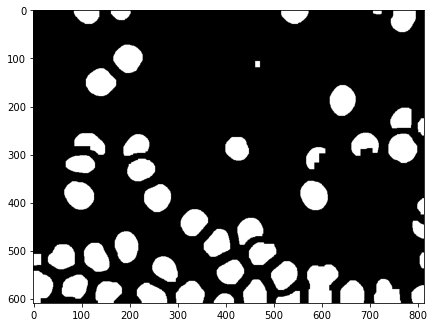

In [12]:
kernel4 = np.ones((6,6),"uint8")
res = cv2.erode(markI2, kernel4, iterations=2)
kernelB = np.ones((4,4),"uint8")
res = cv2.dilate(res,kernelB, iterations = 3)
show(res)

In [13]:
import imutils
contours = cv2.findContours(res.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0]
len(contours)

48

In [14]:
outputImage = img.copy()
for i in range(len(res)):
    for j in range(len(res[i])):
        if(res[i][j]>0):
            outputImage[i][j][0]=255
            outputImage[i][j][1]=0
            outputImage[i][j][2]=0
            

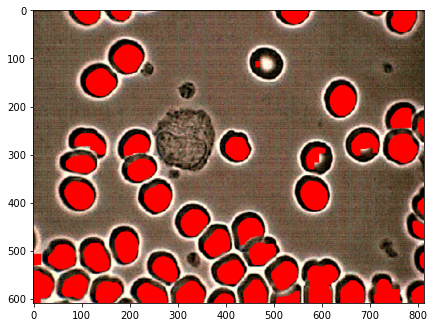

In [15]:
show(outputImage)